In [10]:
import numpy as np

import scipy
import scipy.ndimage
import scipy.signal

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
def draw_basis_window(dims):

    cov = []

    for i in range(dims[0]):
        for j in range(dims[1]):
            impulse = np.zeros(dims)
            impulse[i,j] = 0.5
            cov.append(scipy.ndimage.gaussian_filter(impulse, 3).flatten())
    
    return np.random.multivariate_normal(np.zeros_like(cov[0]), cov).reshape(dims)

def draw_dictionary(N_bases, window_dims):
    return np.vstack([np.expand_dims(draw_basis_window(window_dims), 0) for _ in range(N_bases)])

def draw_activation(length, p):
    return np.random.binomial(1, p, length)

def draw_activations(N_examples, length, p):
    return np.vstack([draw_activation(length, p) for _ in range(N_examples)])

def combine_dictionary_and_activations(A, D):
    X = np.zeros((A.shape[1], D.shape[2]))
    
    for basis, activation in zip(D, A):
        X += scipy.signal.fftconvolve(basis.T, np.atleast_2d(activation)).T[:X.shape[0]]
        
    return X

def add_noise(X, noise_type, scale):
    
    if noise_type == "gaussian":
        noise = np.random.normal(0, scale, X.shape)
            
    return scipy.stats.threshold(X + noise, threshmin=0)
    

/home/matt/usr/anaconda/envs/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: covariance is not positive-semidefinite.


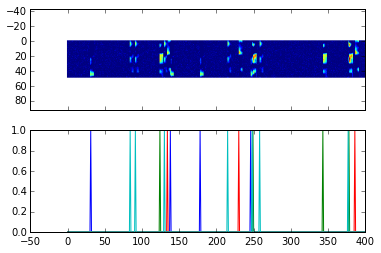

In [40]:
N_bases = 4
N_timesteps = 400
N_freqs = 50
window_width = 5
prob_activation = 0.01

# Create some basis windows
D = draw_dictionary(N_bases, (window_width,N_freqs))


A = draw_activations(N_bases, N_timesteps, prob_activation)
X = combine_dictionary_and_activations(A, D)
noisy_X = add_noise(X, "gaussian", 0.01)

f, axes = plt.subplots(2, sharex=True)
axes[0].imshow(noisy_X.T)
axes[1].plot(A.T)